In [1]:
import pyclesperanto_prototype as cle
from numpy import random
from skimage.io import imshow

# Get a test label image

In [2]:
pointlist = cle.push(random.random((2,25)) * 200) 
print(pointlist)

[[196.12617    54.416378  180.27724    18.01228    34.173218  143.53114
  173.73737    81.73436    58.57614    57.45129   143.90245    65.35432
  150.35013   104.53445    17.567146  185.51569    46.01085   109.18727
  148.5126     69.863846   53.523132   39.58763   109.30443    88.31531
  191.20518  ]
 [162.93413   107.105286   22.920868   39.284813  178.93416   188.87553
   83.70884     0.6752871  52.01047   107.50955    14.954532   40.057934
  178.80856    18.444862    6.4243984 168.38733   107.927765   10.054452
  172.62653    21.282495  110.66594   191.91292    28.895882   24.93193
  117.0418   ]]


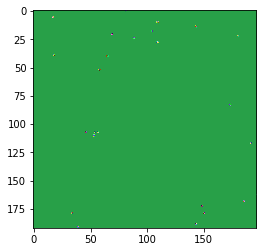

In [3]:
labelled_spots = cle.pointlist_to_labelled_spots(pointlist)
cle.imshow(labelled_spots, labels=True)

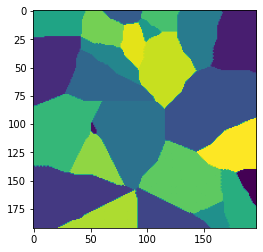

In [4]:
cells = cle.extend_labeling_via_voronoi(labelled_spots)
cle.imshow(cells)

# Analyze and visualize distances between labelled objects

In [5]:
centroids = cle.label_centroids_to_pointlist(cells)
print(centroids)

[[189.98854   52.685715 178.55363   17.529703  31.070807 114.44774
  155.88962   80.071655  60.90635   86.40703  145.1698    69.24675
  159.0331   101.        21.154    179.26253   24.621399 113.03607
  131.9742    59.95965   55.093807  67.87325  115.62534   87.93841
  176.29288 ]
 [151.64185  104.057144  27.152275  48.738617 163.30026  179.11778
   84.58664    4.694704  63.645164 110.69241   21.737526  42.786304
  181.26714   16.93596   10.964462 168.7841   105.69856    7.753507
  148.76114   16.076336 132.7204   180.0395    50.449493  29.155592
  121.37461 ]]


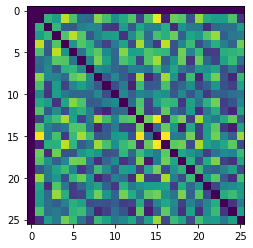

In [6]:
distance_matrix = cle.generate_distance_matrix(centroids, centroids)
cle.imshow(distance_matrix)

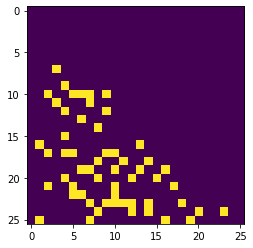

In [7]:
touch_matrix = cle.generate_touch_matrix(cells)
cle.imshow(touch_matrix)

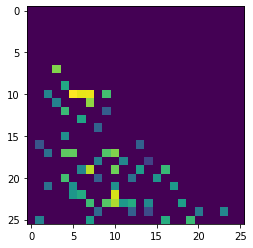

In [8]:
touch_distance_matrix = cle.multiply_images(touch_matrix, distance_matrix)
cle.imshow(touch_distance_matrix)

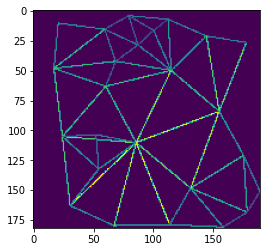

In [9]:
distance_mesh = cle.touch_matrix_to_mesh(centroids, touch_distance_matrix)
cle.imshow(distance_mesh)

# Sepcial meshes
## Mesh of touching neighbors

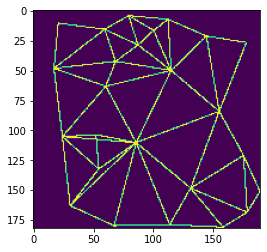

In [10]:
angle_mesh = cle.touch_matrix_to_mesh(centroids, touch_matrix)
cle.imshow(angle_mesh)

## Mesh nearest neighbors

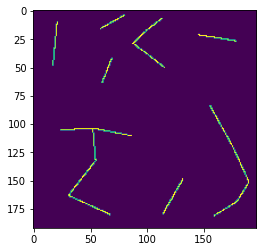

In [11]:
nearest_neighbor_mesh = cle.draw_mesh_between_n_closest_labels(cells, n=1)
cle.imshow(nearest_neighbor_mesh)

## Meshes of proximal neighbors/

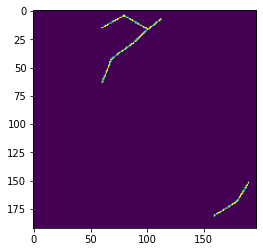

In [12]:
close_neighbors_mesh = cle.draw_mesh_between_proximal_labels(cells, maximum_distance=25)
cle.imshow(close_neighbors_mesh)

## Distance meshes
This is the same custom mesh as shown in the section on top

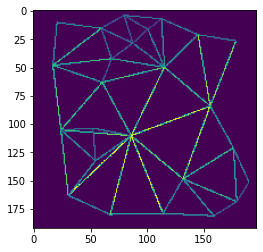

In [13]:
distance_mesh = cle.draw_distance_mesh_between_touching_labels(cells)
cle.imshow(distance_mesh)

# Angle meshes
An angle mesh describes in which directions lines point. Angles range from -0.5pi to 0.5pi radians or -90 to 90 degrees, respectively. 90 and -90 degrees corresponds to top/bottom, 0 degrees corresponds to right to the left.

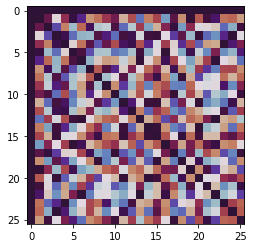

In [14]:
angle_matrix = cle.generate_angle_matrix(centroids, centroids)
# convert
angle_matrix = cle.radians_to_degrees(angle_matrix)
# correct NaNs for visualisation

angle_matrix = cle.undefined_to_zero(angle_matrix)

cle.imshow(angle_matrix, color_map='twilight')

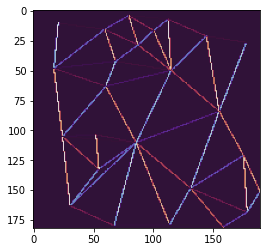

In [15]:
angle_touch_matrix = cle.multiply_images(angle_matrix, touch_matrix)
angle_mesh = cle.touch_matrix_to_mesh(centroids, angle_touch_matrix)
cle.imshow(angle_mesh, color_map='twilight')